<font size = 10>
Objective 1:

<font size = 5>

My aim in this objective is to find out which operator has the best service by the percentage of buses owned by the different operators in Singapore, distance covered, time operated as well as the efficiency of the buses.

<font size = 4>
Firstly, I would like to compare the different bus types by distance.

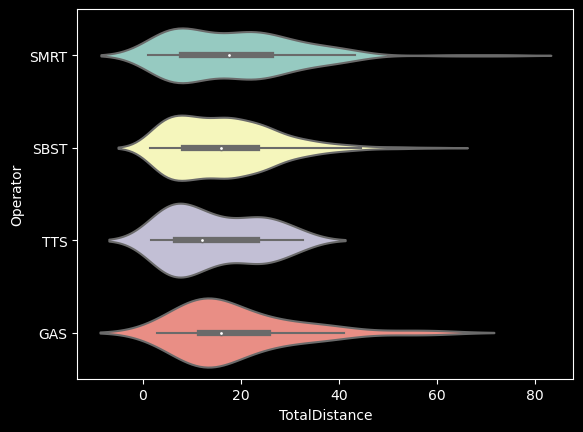

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../bus-routes-services-stops/routes-and-services-CLEANSED.csv')

sns.violinplot(data = df, x = "TotalDistance", y = "Operator")

plt.show()

In [46]:
df = pd.read_csv('../bus-routes-services-stops/routes-and-services-CLEANSED.csv')

df["Loop"] = df["LoopDesc"].apply(lambda x: "No Loop" if x == "No Loop" else "Loops")
print(df)

     Unnamed: 0 ServiceNo Operator  Direction         Category  OriginCode  \
0             0       599     SMRT          1  FLAT FARE $5.00     64449.0   
1             1       598     SMRT          1  FLAT FARE $5.00     44859.0   
2             2       590     SMRT          1  FLAT FARE $5.00     45421.0   
3             3       589     SMRT          1  FLAT FARE $4.00     17429.0   
4             4       588     SMRT          1  FLAT FARE $4.00     53369.0   
..          ...       ...      ...        ...              ...         ...   
550         550        12      GAS          2            TRUNK     10499.0   
551         551       119      GAS          1            TRUNK     65009.0   
552         552      118B      GAS          1            TRUNK     96111.0   
553         553      118A      GAS          1            TRUNK     65199.0   
554         554       118      GAS          2            TRUNK     97009.0   

     DestinationCode       LoopDesc  StopSequence  BusStopCode 

In [47]:
import plotly.express as px

fig = px.sunburst(df, path=['Operator', 'Category'], values='TotalDistance', template = 'plotly_dark' ,hover_data=['Operator'])

fig.update_layout(
    width= 800,
    height=800,
    title=dict(
        text="Fraction of buses, category of buses and total distance.",
        font=dict(
            size=20,
            color="white"
        )
    )
)

# Show the plot
fig.show()

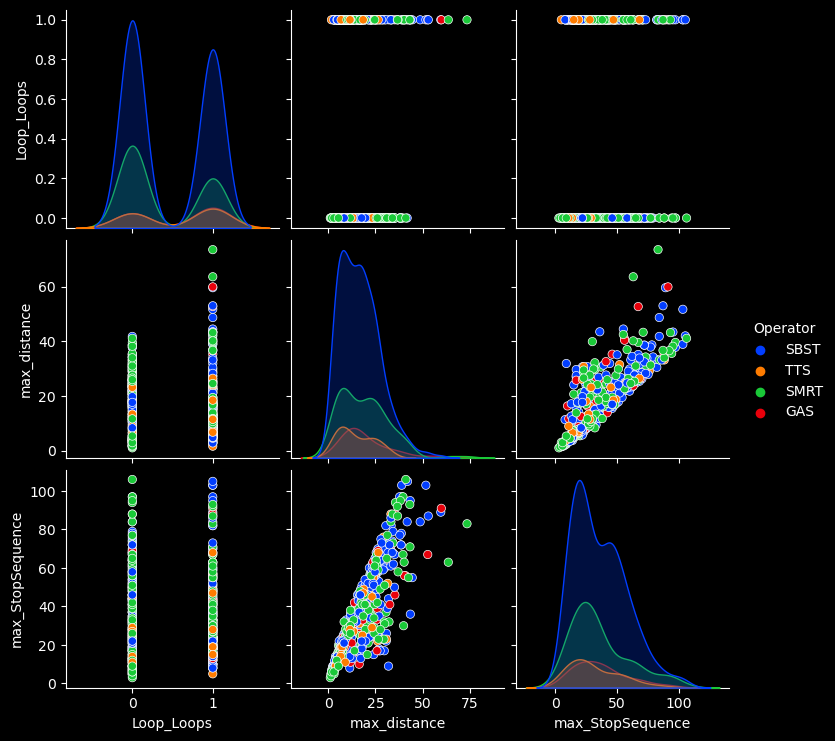

In [48]:
import seaborn as sns
%matplotlib inline
ss = pd.read_csv('../bus-routes-services-stops/maxDistSeq.csv')
ss = ss.drop(["Unnamed: 0"], axis = 'columns')
ss = ss.merge(df[['ServiceNo', 'Loop']], on='ServiceNo', how='left')

ss = pd.get_dummies(ss, columns=["Loop"])

plt.style.use("dark_background")
g = sns.pairplot(ss, vars=['Loop_Loops', 'max_distance', 'max_StopSequence'], diag_kind = 'kde', palette="bright", hue = 'Operator', height=2.5)
ax = g.axes[0][1]

# Change the y-axis label
ax.set_ylabel("Average ridership (in thousands)")
plt.show()

<font size = 10>
Objective 2:

<font size = 5>

My second objective is to find out whether the MRT is a better mode of transport than the MRT, by looking at the amount of ridership, fares as well as the change in trend over the years

Firstly, I would like to see the distribution of distance travelled against total ridership over the years. If the distance increases while the ridership increases, this shows that the coverage is encouraging more people to take the public transport. If the distance decreases while the ridership increases, this shows that the public transport has increased interconnectedness, which encourages people to take the public transport.

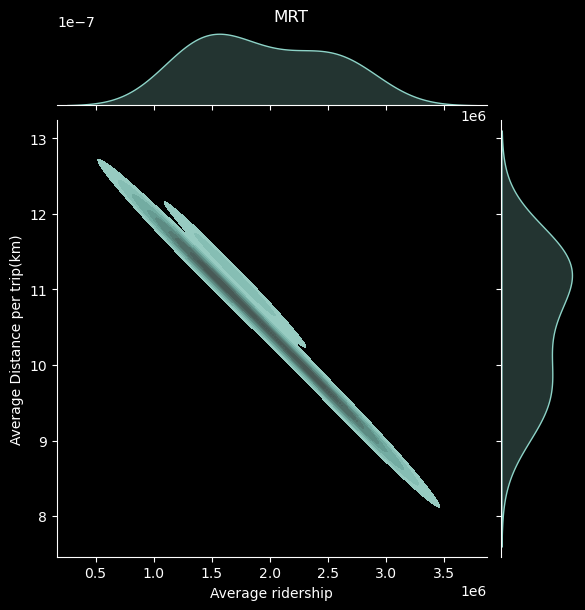

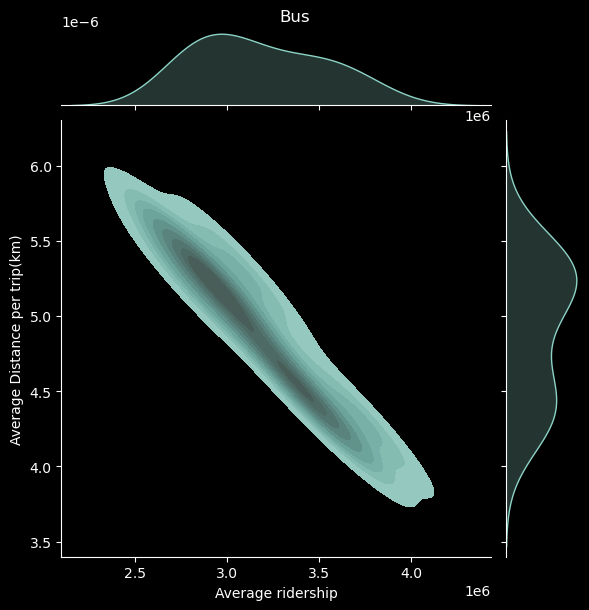

In [49]:
dft = pd.read_csv('../bus-routes-services-stops/trains-cleansed.csv')
dft = dft.drop(columns = ['Unnamed: 0'])

df_mrt = dft[dft['mode'] == 'MRT']

df_bus = dft[dft['mode'] == 'Bus']

final_df = [df_mrt, df_bus]

for dft in final_df:
    mode = dft['mode'].unique()
    plt.style.use("dark_background")
    sns.jointplot(x='average_ridership', y='ave_distance_per_trip', data=dft, kind='kde', palette="deep", fill=True)
    plt.ylabel('Average Distance per trip(km)')
    plt.xlabel('Average ridership')
    plt.suptitle(f'{mode[0]}', y=1.01)
    plt.show()

In [44]:
import statsmodels.api as sm
import plotly.graph_objects as go


fig = px.scatter(dft, x='year', y='ave_distance_per_trip', color='mode', template = 'plotly_dark')

mrt_reg_line = sm.OLS(df_mrt['ave_distance_per_trip'], sm.add_constant(df_mrt['year'])).fit().params
bus_reg_line = sm.OLS(df_bus['ave_distance_per_trip'], sm.add_constant(df_bus['year'])).fit().params

mrt_line = go.Scatter(x=df_mrt['year'], y=df_mrt['year']*mrt_reg_line[1] + mrt_reg_line[0],
                     mode='lines', name='MRT Regression Line', visible=True,
                     line=dict(color='blue', dash='dash'))

bus_line = go.Scatter(x=df_bus['year'], y=df_bus['year']*bus_reg_line[1] + bus_reg_line[0],
                      mode='lines', name='Bus Regression Line', visible=True,
                      line=dict(color='red', dash='dash'))

fig.add_traces([mrt_line, bus_line])

# Add a button to switch between modes
updatemenus = list([
    dict(
        buttons=list([
            dict(
                args=[{'mode': 'markers'}],
                label='All modes',
                method='update'
            ),
            dict(
                args=[
                    {'mode': 'markers', 'marker.color': 'red', 'marker.symbol': 'cross', 'showlegend': True},
                    {'visible': [True if mode == 'Bus' else False for mode in dft['mode']]},
                    {'visible': [bus_line]}
                ],
                label='Bus',
                method='update'
            ),
            dict(
                args=[
                    {'mode': 'markers', 'marker.color': 'blue', 'marker.symbol': 'diamond', 'showlegend': True},
                    {'visible': [True if mode == 'MRT' else False for mode in dft['mode']]},
                    {'visible': [mrt_line]}
                ],
                label='MRT',
                method='update'
            )

        ]),
        type='buttons',
        showactive=True,
        direction='right',
        x=0.57,
        y=1.1
    )
])
fig.data[1].visible=False
fig.data[3].visible=False
fig.show()


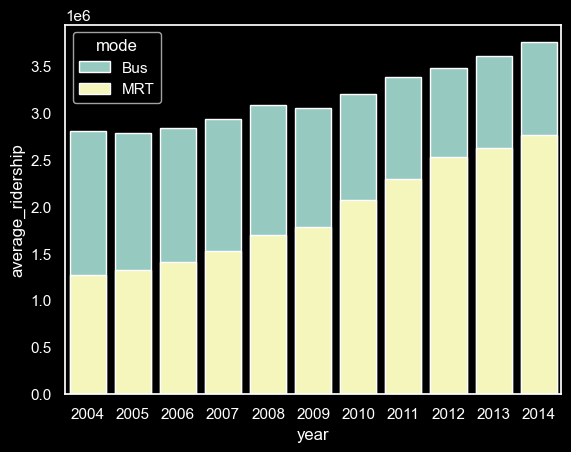

In [ ]:
combined = pd.concat([df_mrt, df_bus], axis=0)

pivoted = combined.pivot(index='year', columns='mode', values='average_ridership')
melted = pivoted.reset_index().melt(id_vars='year', value_vars=['Bus', 'MRT'], value_name='average_ridership')

sns.barplot(x='year', y='average_ridership', hue='mode', data=melted, dodge=False)

plt.show()